In [ ]:
https://raw.githubusercontent.com/Vandawang/stat306/main/day.csv

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [3]:
dataSet<-read.csv(file="https://raw.githubusercontent.com/Vandawang/stat306/main/day.csv",header=TRUE,sep=",")
print("Table 1: Raw data set") 
head(dataSet)
nrow(dataSet)

[1] "Table 1: Raw data set"


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.1604460,331,654,985
2,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.2485390,131,670,801
3,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.2483090,120,1229,1349
4,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.1602960,108,1454,1562
5,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.1869000,82,1518,1600
6,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.0895652,88,1518,1606


[1] 731

In [4]:
dataSet_tidy <- dataSet |>
              select(cnt,season,weathersit,temp,atemp,hum)|>

              filter(cnt!="n/a", 
                     season!="n/a",
                     weathersit!="n/a",
                     temp!="n/a",
                     atemp!="n/a",
                     hum!="n/a",
                     cnt!="", 
                     season!="",
                     weathersit!="",
                     temp!="",
                     atemp!="",
                     hum!="") |>
        mutate(season = as.factor(season),
               weathersit= as.factor(weathersit))

print("Table 2: Tidy form dataset") 
head(dataSet_tidy)
nrow(dataSet_tidy)

[1] "Table 2: Tidy form dataset"


,cnt,season,weathersit,temp,atemp,hum
,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>
1,985,1,2,0.344167,0.363625,0.805833
2,801,1,2,0.363478,0.353739,0.696087
3,1349,1,1,0.196364,0.189405,0.437273
4,1562,1,1,0.200000,0.212122,0.590435
5,1600,1,1,0.226957,0.229270,0.436957
6,1606,1,1,0.204348,0.233209,0.518261


[1] 731

In [14]:
dataSet_tidy$log_cnt <- log(dataSet_tidy$cnt)
full_model <- lm(log_cnt ~ season*temp+season*hum+weathersit*temp+weathersit*hum, data = dataSet_tidy)
summary(full_model)


Call:
lm(formula = log_cnt ~ season * temp + season * hum + weathersit * 
    temp + weathersit * hum, data = dataSet_tidy)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1641 -0.1971  0.0180  0.2475  1.4997 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)       6.99305    0.14252  49.066  < 2e-16 ***
season2           0.95468    0.20965   4.554 6.20e-06 ***
season3           2.58233    0.39808   6.487 1.64e-10 ***
season4           1.12441    0.20620   5.453 6.83e-08 ***
temp              3.32642    0.27905  11.921  < 2e-16 ***
hum              -0.34093    0.24785  -1.376 0.169394    
weathersit2       0.41066    0.18466   2.224 0.026471 *  
weathersit3      -1.87775    0.42129  -4.457 9.64e-06 ***
season2:temp     -1.75896    0.34725  -5.065 5.19e-07 ***
season3:temp     -4.27264    0.48787  -8.758  < 2e-16 ***
season4:temp     -1.37069    0.38012  -3.606 0.000333 ***
season2:hum      -0.13578    0.26919  -0.504 0.614142    
season3:hum 

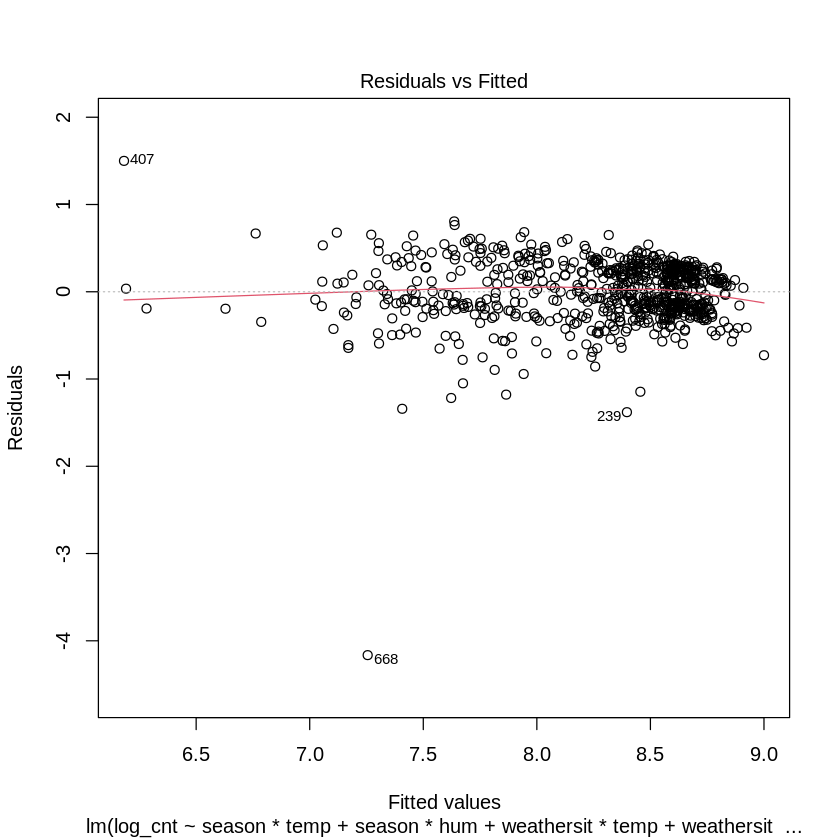

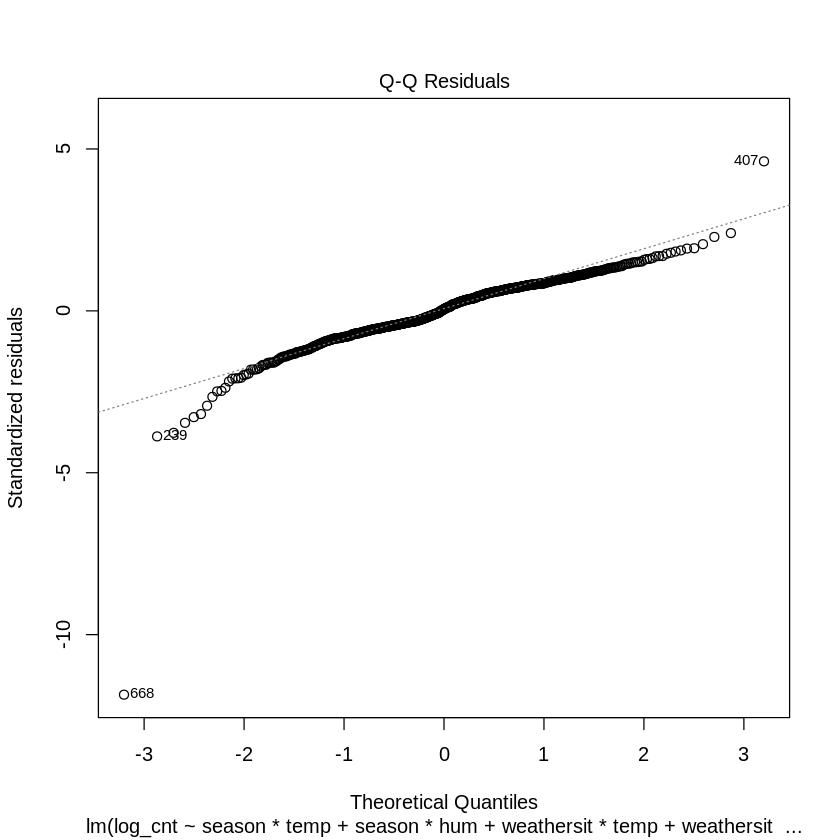

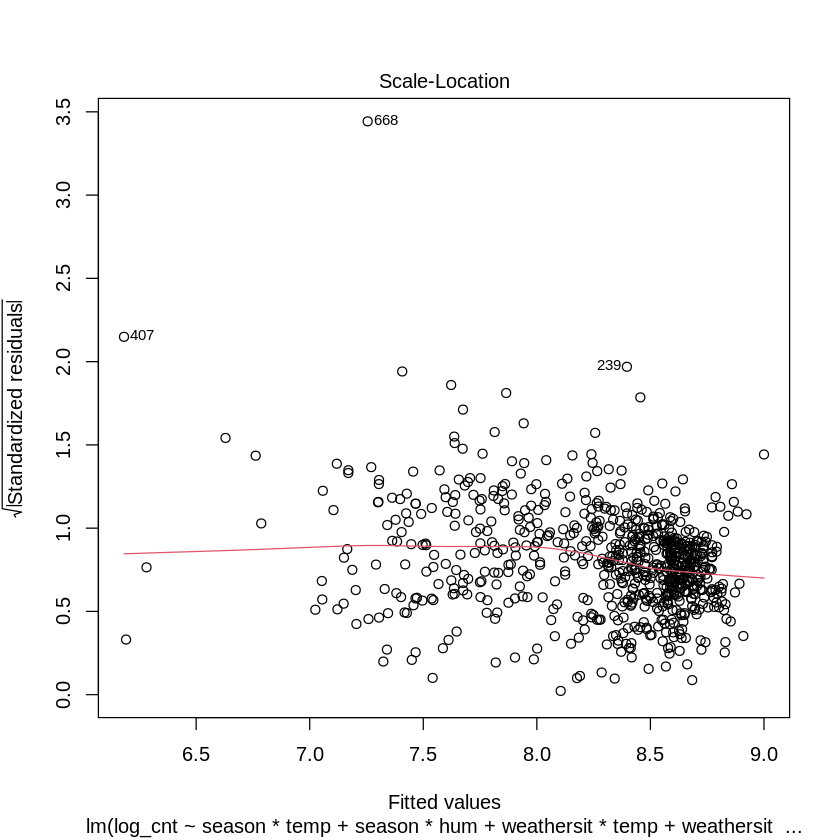

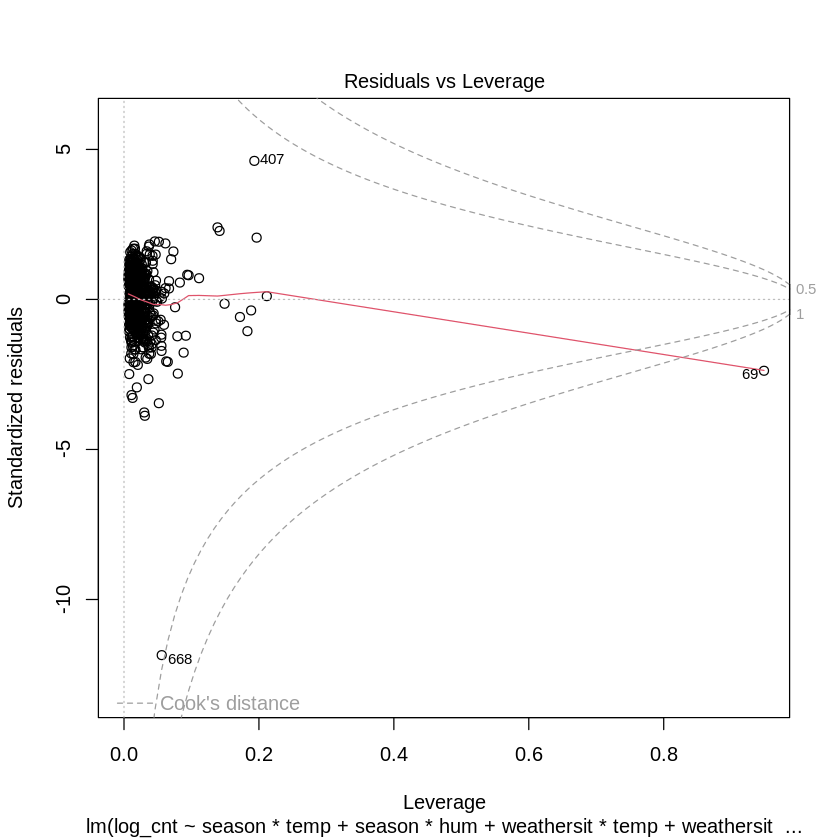

In [15]:
plot(full_model)

In [16]:
install.packages("leaps")
library(leaps)
regfit_full <- regsubsets(log_cnt ~ season*temp+season*hum+weathersit*temp+weathersit*hum, data = dataSet_tidy, nbest=1, nvmax=NULL, method="exhaustive")
summary_regfit_full <- summary(regfit_full)
summary_regfit_full$which

Installing package into ‘/home/jupyter/R/x86_64-pc-linux-gnu-library/4.3’
(as ‘lib’ is unspecified)



,(Intercept),season2,season3,season4,temp,hum,weathersit2,weathersit3,season2:temp,season3:temp,season4:temp,season2:hum,season3:hum,season4:hum,temp:weathersit2,temp:weathersit3,hum:weathersit2,hum:weathersit3
1,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
3,TRUE,FALSE,FALSE,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
4,TRUE,FALSE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
5,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
6,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
7,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
8,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
9,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
10,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE


In [19]:
x_values <- c(2:18)
y_values <- summary_regfit_full$cp
length(y_values)

[1] 17

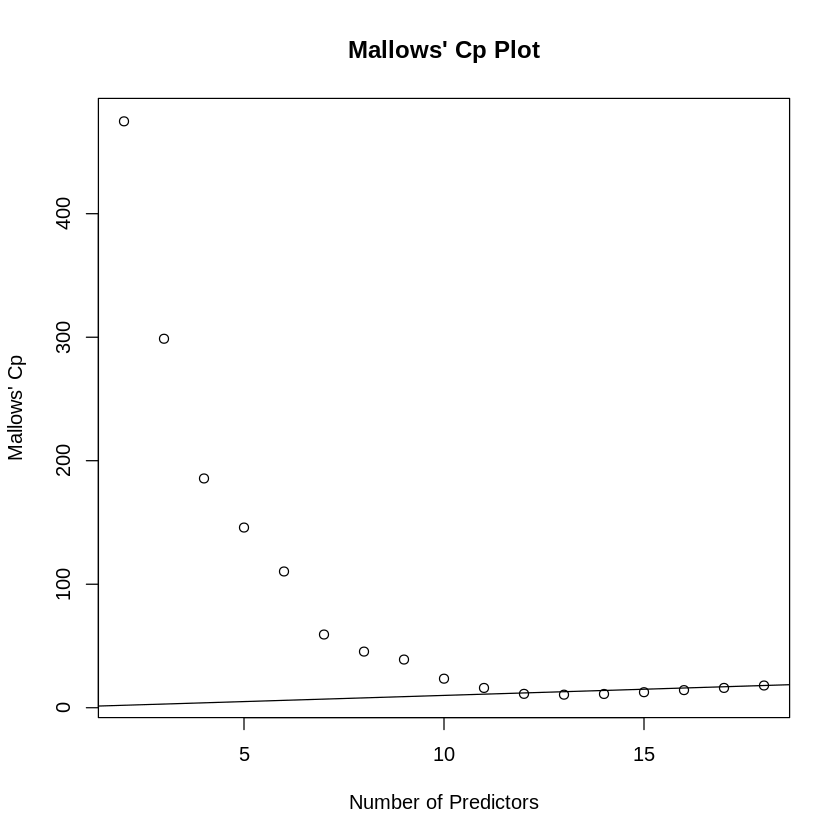

In [20]:
summary_regfit_full <- summary(regfit_full)
plot(x=x_values,y = y_values, xlab="Number of Predictors", ylab="Mallows' Cp", main="Mallows' Cp Plot")
abline(0,1) 

In [12]:
summary_regfit_full$which[13,]

(Intercept)             season2             season3             season4 
               TRUE                TRUE                TRUE                TRUE 
        weathersit2         weathersit3                temp                 hum 
               TRUE                TRUE                TRUE                TRUE 
season2:weathersit2 season3:weathersit2 season4:weathersit2 season2:weathersit3 
              FALSE               FALSE               FALSE               FALSE 
season3:weathersit3 season4:weathersit3        season2:temp        season3:temp 
              FALSE                TRUE                TRUE                TRUE 
       season4:temp         season2:hum         season3:hum         season4:hum 
               TRUE               FALSE               FALSE               FALSE 
   weathersit2:temp    weathersit3:temp     weathersit2:hum     weathersit3:hum 
              FALSE               FALSE                TRUE                TRUE

In [23]:
head(dataSet_tidy)

,cnt,season,weathersit,temp,atemp,hum,log_cnt
,<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,985,1,2,0.344167,0.363625,0.805833,6.892642
2,801,1,2,0.363478,0.353739,0.696087,6.685861
3,1349,1,1,0.196364,0.189405,0.437273,7.207119
4,1562,1,1,0.200000,0.212122,0.590435,7.353722
5,1600,1,1,0.226957,0.229270,0.436957,7.377759
6,1606,1,1,0.204348,0.233209,0.518261,7.381502


In [28]:
library(tidyverse)
wide_format_dataset <- pivot_wider(dataSet_tidy, names_from = "season", values_from = "season")
wide_format_dataset$"1" <- ifelse(is.na(wide_format_dataset$"1"), 0 , 1)
wide_format_dataset$"2" <- ifelse(is.na(wide_format_dataset$"2"), 0 , 1)
wide_format_dataset$"3" <- ifelse(is.na(wide_format_dataset$"3"), 0 , 1)
wide_format_dataset$"4" <- ifelse(is.na(wide_format_dataset$"4"), 0 , 1)
colnames(wide_format_dataset)[7] <- "Spring"
colnames(wide_format_dataset)[8] <- "Summer"
colnames(wide_format_dataset)[9] <- "Fall"
colnames(wide_format_dataset)[10] <- "Winter"
wide_format_dataset

cnt,weathersit,temp,atemp,hum,log_cnt,Spring,Summer,Fall,Winter
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
985,2,0.3441670,0.3636250,0.805833,6.892642,1,0,0,0
801,2,0.3634780,0.3537390,0.696087,6.685861,1,0,0,0
1349,1,0.1963640,0.1894050,0.437273,7.207119,1,0,0,0
1562,1,0.2000000,0.2121220,0.590435,7.353722,1,0,0,0
1600,1,0.2269570,0.2292700,0.436957,7.377759,1,0,0,0
1606,1,0.2043480,0.2332090,0.518261,7.381502,1,0,0,0
1510,2,0.1965220,0.2088390,0.498696,7.319865,1,0,0,0
959,2,0.1650000,0.1622540,0.535833,6.865891,1,0,0,0
822,1,0.1383330,0.1161750,0.434167,6.711740,1,0,0,0


In [30]:
print(wide_format_dataset)
wide_format_dataset <- pivot_wider(wide_format_dataset, names_from = "weathersit", values_from = "weathersit")
wide_format_dataset$"1" <- ifelse(is.na(wide_format_dataset$"1"), 0 , 1)
wide_format_dataset$"2" <- ifelse(is.na(wide_format_dataset$"2"), 0 , 1)
wide_format_dataset$"3" <- ifelse(is.na(wide_format_dataset$"3"), 0 , 1)
head(wide_format_dataset)
colnames(wide_format_dataset)[12] <- "RS"
colnames(wide_format_dataset)[10] <- "Cloudy"
colnames(wide_format_dataset)[11] <- "clear"
print(wide_format_dataset)

# A tibble: 731 × 12
     cnt  temp atemp   hum log_cnt Spring Summer  Fall Winter    RS Cloudy Clear
   <int> <dbl> <dbl> <dbl>   <dbl>  <dbl>  <dbl> <dbl>  <dbl> <dbl>  <dbl> <dbl>
 1   985 0.344 0.364 0.806    6.89      1      0     0      0     1      0     0
 2   801 0.363 0.354 0.696    6.69      1      0     0      0     1      0     0
 3  1349 0.196 0.189 0.437    7.21      1      0     0      0     0      1     0
 4  1562 0.2   0.212 0.590    7.35      1      0     0      0     0      1     0
 5  1600 0.227 0.229 0.437    7.38      1      0     0      0     0      1     0
 6  1606 0.204 0.233 0.518    7.38      1      0     0      0     0      1     0
 7  1510 0.197 0.209 0.499    7.32      1      0     0      0     1      0     0
 8   959 0.165 0.162 0.536    6.87      1      0     0      0     1      0     0
 9   822 0.138 0.116 0.434    6.71      1      0     0      0     0      1     0
10  1321 0.151 0.151 0.483    7.19      1      0     0      0     0      1     0
# ℹ 721

ERROR: [1m[33mError[39m in `pivot_wider()`:[22m
[33m![39m Can't subset columns that don't exist.
[31m✖[39m Column `weathersit` doesn't exist.


In [31]:
summary_regfit_full$which[13,]

(Intercept)          season2          season3          season4 
            TRUE             TRUE             TRUE             TRUE 
            temp              hum      weathersit2      weathersit3 
            TRUE             TRUE             TRUE             TRUE 
    season2:temp     season3:temp     season4:temp      season2:hum 
            TRUE             TRUE             TRUE            FALSE 
     season3:hum      season4:hum temp:weathersit2 temp:weathersit3 
           FALSE             TRUE            FALSE            FALSE 
 hum:weathersit2  hum:weathersit3 
            TRUE             TRUE

In [33]:
summary(lm(log(cnt)~Summer+Fall+Winter+temp+hum+Cloudy+RS+Summer*temp+Fall*temp+Winter*temp+Winter*hum+hum*Cloudy+hum*RS,wide_format_dataset))


Call:
lm(formula = log(cnt) ~ Summer + Fall + Winter + temp + hum + 
    Cloudy + RS + Summer * temp + Fall * temp + Winter * temp + 
    Winter * hum + hum * Cloudy + hum * RS, data = wide_format_dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1614 -0.1993  0.0198  0.2482  1.4204 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.2849     0.3622  14.591  < 2e-16 ***
Summer        0.8747     0.1486   5.885 6.11e-09 ***
Fall          2.6149     0.2848   9.183  < 2e-16 ***
Winter        1.0883     0.1888   5.764 1.22e-08 ***
temp          3.3944     0.2650  12.811  < 2e-16 ***
hum           0.2951     0.4075   0.724 0.469163    
Cloudy        1.7371     0.3608   4.814 1.81e-06 ***
RS            2.1711     0.3844   5.648 2.34e-08 ***
Summer:temp  -1.7726     0.3433  -5.163 3.15e-07 ***
Fall:temp    -4.3912     0.4663  -9.416  < 2e-16 ***
Winter:temp  -1.3660     0.3779  -3.615 0.000322 ***
Winter:hum   -0.3101     0.2586  -1.199 0.230845